# Импорт библиотек

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras import utils 
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

# Подготовка данных

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)


x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Подготовка модели

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 1,608,782
Trainable params: 1,608,780
Non-trainable params: 2
____________________________________________

# Обучение сети

Epoch 1/15
469/469 [==============================] - 46s 97ms/step - loss: 0.1770 - accuracy: 0.9456 - val_loss: 0.0667 - val_accuracy: 0.9792
Epoch 2/15
469/469 [==============================] - 45s 96ms/step - loss: 0.0544 - accuracy: 0.9835 - val_loss: 0.0575 - val_accuracy: 0.9813
Epoch 3/15
469/469 [==============================] - 45s 96ms/step - loss: 0.0355 - accuracy: 0.9889 - val_loss: 0.0514 - val_accuracy: 0.9841
Epoch 4/15
469/469 [==============================] - 45s 96ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0521 - val_accuracy: 0.9840
Epoch 5/15
469/469 [==============================] - 45s 96ms/step - loss: 0.0164 - accuracy: 0.9946 - val_loss: 0.0518 - val_accuracy: 0.9846
Epoch 6/15
469/469 [==============================] - 45s 97ms/step - loss: 0.0103 - accuracy: 0.9966 - val_loss: 0.0500 - val_accuracy: 0.9855
Epoch 7/15
469/469 [==============================] - 45s 96ms/step - loss: 0.0107 - accuracy: 0.9962 - val_loss: 0.0496 - val_accuracy:

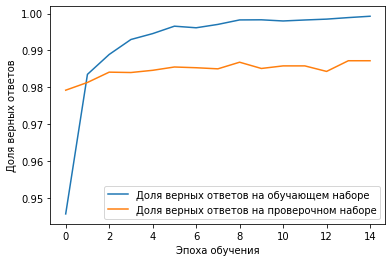

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()